In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math


## Import the dataframe's data

In [49]:
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## Understand the datafram

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Determine if a person is overweight

In [51]:
df['overweight'] = (df["weight"] / pow((df["height"]/100), 2) > 25).astype(int)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


## Draw the Categorical Plot

### Normaliser les valeurs des catégories

0. La personne est en bonne santé
1. La personne est malade

In [52]:
df['cholesterol'] = np.where(df['cholesterol'] == 1, 0, 1)
df['gluc'] = np.where(df['gluc'] == 1, 0, 1)
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

Créer un dataframe de forme longue afin de favoriser la comparaison des variables

In [53]:
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["smoke", "alco", "active"])
df_cat

,cardio,variable,value
0,0,smoke,0
1,1,smoke,0
2,1,smoke,0
3,1,smoke,0
4,0,smoke,0
...,...,...,...
209995,0,active,1
209996,1,active,1
209997,1,active,0
209998,1,active,0


In [54]:
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,smoke,0,31781
5,0,smoke,1,3240
6,1,active,0,7361
7,1,active,1,27618
8,1,alco,0,33156
9,1,alco,1,1823


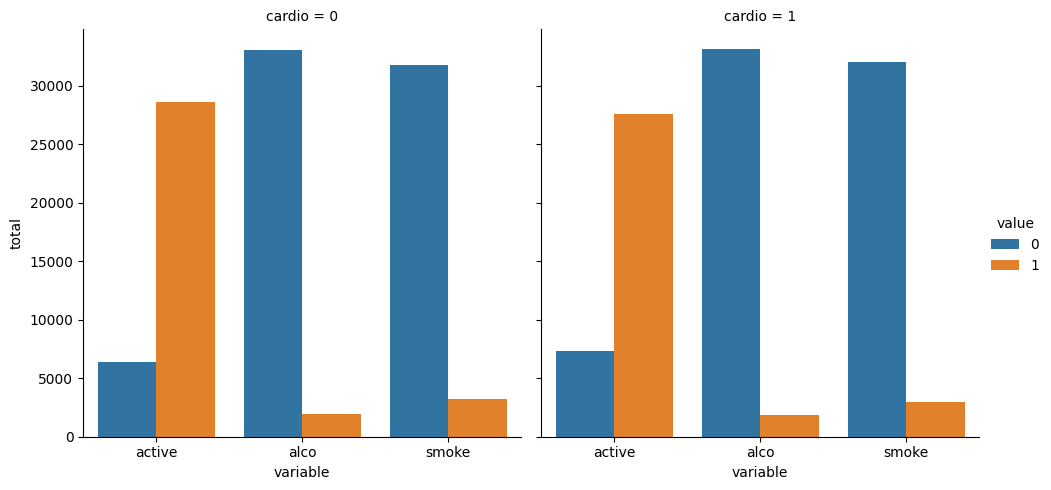

In [55]:
fig = sns.catplot(data=df_cat, x='variable', y='total', hue='value', col='cardio', kind='bar')

## HEAT MAP

In [56]:
df_heat = df[
            (df['ap_lo'] <= df['ap_hi']) & 
             (df['weight'] >= df['weight'].quantile(0.025)) &
             (df['weight'] <= df['weight'].quantile(0.975)) &
             (df['height'] >= df['height'].quantile(0.025)) &
             (df['height'] <= df['height'].quantile(0.975))
             ]

In [57]:
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [58]:
corr = df_heat.corr()

In [59]:
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

<Axes: >

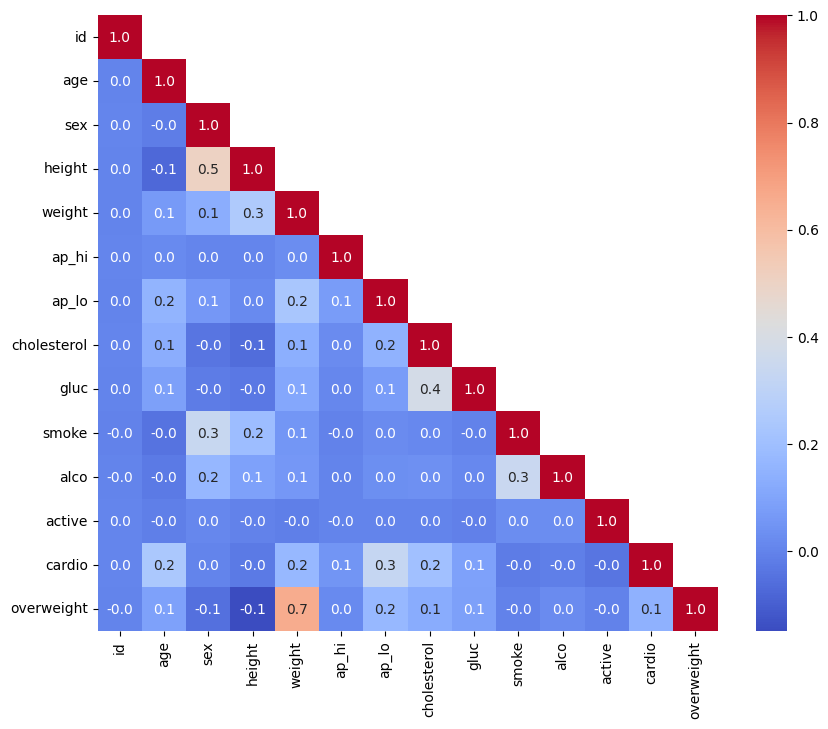

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=mask, annot=True, fmt='.1f', cmap='coolwarm', 
            ax=ax,
            xticklabels=corr.columns,
            yticklabels=corr.index)